## Predicting Customer Behavior

In [62]:
## Importing libraries for classification
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
os.chdir("C:\\Users\\USER\\Desktop\\edwisor practise\\jupyterpract\\udemy\\Practical")

In [73]:
##importing file social networking ads and sepaarting dependent and independent variables
df_logi=pd.DataFrame(pd.read_csv('C:\\Users\\USER\\Desktop\\edwisor practise\\jupyterpract\\udemy\\Practical\\Dataset\\Social_Network_Ads.csv'))
df_logi.head()
x=df_logi.iloc[:,[2,3]]
y=df_logi.iloc[:,4]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
## training and test dataset
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
##Preprocessing

sc=StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_ts=sc.transform(x_ts)
#x_tr.shape,x_ts.shape

In [ ]:
## Logistic regression

lr=LogisticRegression(random_state=0)
lr.fit(x_tr,y_tr)
ylr_pred=lr.predict(x_ts)

# Visualization:
X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
    

In [ ]:
## Logistic regression evaluation

cm=confusion_matrix(y_ts,ylr_pred)
cm

In [ ]:
## KNN 

kn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn.fit(x_tr,y_tr)
ykn_pred=kn.predict(x_ts)
ykn_pred
cm=confusion_matrix(y_ts,ykn_pred)
cm

#visualization:

X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, kn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [ ]:
## SVM

svm=SVC(kernel='linear',random_state=0)
svm.fit(x_tr,y_tr)
ysvc_pred=svm.predict(x_ts)
cm=confusion_matrix(y_ts,ysvc_pred)
cm
# Visualizaton:

X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM result')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
## kernel SVM
kersvm=SVC(kernel='rbf',random_state=0)
kersvm.fit(x_tr,y_tr)
yksvm_pred=kersvm.predict(x_ts)
cm=confusion_matrix(y_ts,yksvm_pred)
cm
# Visualization:

X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, kersvm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM result')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
## Naive bayes

gnb=GaussianNB()
gnb.fit(x_tr,y_tr)
ygnb_pred=gnb.predict(x_ts)
cm=confusion_matrix(y_ts,ygnb_pred)
cm
# Visualization:
X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, gnb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
## DCT 
dct=DecisionTreeClassifier(random_state=0)
dct.fit(x_tr,y_tr)
ydct_pred=dct.predict(x_ts)
cm=confusion_matrix(y_ts,ydct_pred)
cm
# Visualization:

X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('DCT')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
## Random forest  

rf=RandomForestClassifier(random_state=0,n_estimators=100)
rf.fit(x_tr,y_tr)
yrf_pred=rf.predict(x_ts)
cm=confusion_matrix(y_ts,yrf_pred)
cm
# visualization: 
X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random forest')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [61]:
## Model selection and boosting:
## Using K cross fold to select model giving best accuracy:
classifier=[lr,kn,svm,kersvm,gnb,dct,rf]
model=['lr','kn','svm','kersvm','gnb','dct','rf']
accuracies=[(model[i],cross_val_score(estimator=classifier[i],X=x_tr,y=y_tr,cv=10).mean()) for i in range(len(classifier))]

## using grid search to tune hyperparameters:


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [60]:
accuracies

[('lr', 0.831515762463343),
 ('kn', 0.9034029814271751),
 ('svm', 0.8158846529814271),
 ('kersvm', 0.897146871945259),
 ('gnb', 0.869122678396872),
 ('dct', 0.8404050586510264),
 ('rf', 0.884558284457478)]

In [67]:
parameters=[{'n_neighbors':[3,5,7,9,11,13],'algorithm':['auto','brute'],'metric':['minkowski'],'p':[2]},
             {'n_neighbors':[3,5,7,9,11,13],'algorithm':['ball_tree', 'kd_tree'],'leaf_size': [30,50,70,100],
             'metric':['minkowski'], 'p':[2]
             }]

grid_search=GridSearchCV(estimator=kn,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
             

In [68]:
grid_search.fit(x_tr,y_tr)
best_acc=grid_search.best_score_
best_parameters = grid_search.best_params_

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
best_acc,best_parameters

(0.909375,
 {'algorithm': 'ball_tree',
  'leaf_size': 50,
  'metric': 'minkowski',
  'n_neighbors': 7,
  'p': 2})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


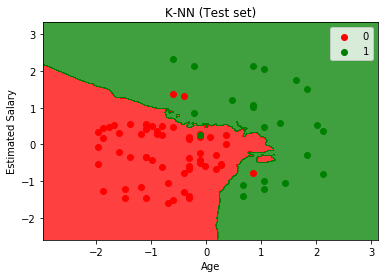

In [71]:
## Building model with tuned hyperparameters:
knn=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree',leaf_size=50,metric='minkowski',p=2)
knn.fit(x_tr,y_tr)
y_pred=knn.predict(x_ts)

# Visualization:

X_set, y_set = x_ts, y_ts
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN with hyperparameters')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [72]:
confusion_matrix(y_ts,y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)